In [ ]:
!pip install huggingface_hub --quiet

from huggingface_hub import login

import getpass
token = getpass.getpass("Please enter your Hugging Face token: ")

login(token)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Primjena neuronskih mreža u analizi sentimenta"

Mounted at /content/drive
/content/drive/MyDrive/Primjena neuronskih mreža u analizi sentimenta


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt_tab') #tokens = nltk.word_tokenize(example)
nltk.download('averaged_perceptron_tagger_eng') #tagged = nltk.pos_tag(tokens)
nltk.download('maxent_ne_chunker_tab') #entities = nltk.chunk.ne_chunk(tagged)
nltk.download('words') #entities = nltk.chunk.ne_chunk(tagged)
nltk.download('vader_lexicon') #sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
print(df.shape)

(23486, 11)


In [4]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


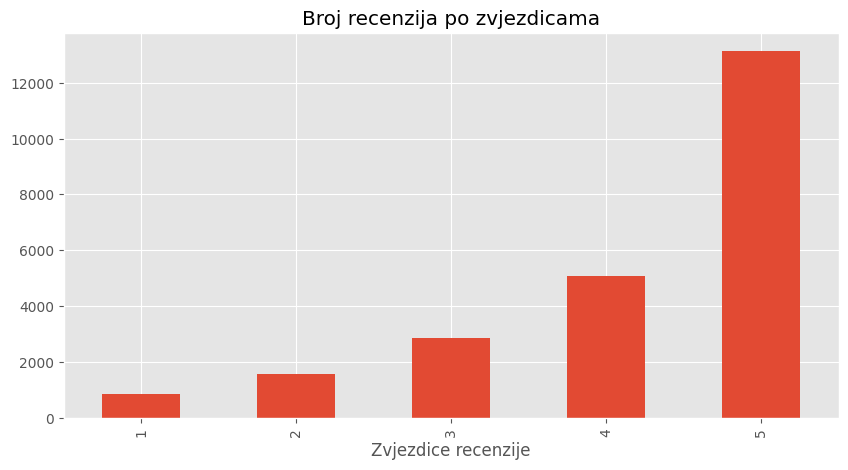

In [5]:
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Broj recenzija po zvjezdicama',
          figsize=(10, 5))
ax.set_xlabel('Zvjezdice recenzije')
plt.show()

In [6]:
example = df['Review Text'][2]
print(example)

I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c


In [7]:
tokens = nltk.word_tokenize(example)
tokens[:]

['I',
 'had',
 'such',
 'high',
 'hopes',
 'for',
 'this',
 'dress',
 'and',
 'really',
 'wanted',
 'it',
 'to',
 'work',
 'for',
 'me',
 '.',
 'i',
 'initially',
 'ordered',
 'the',
 'petite',
 'small',
 '(',
 'my',
 'usual',
 'size',
 ')',
 'but',
 'i',
 'found',
 'this',
 'to',
 'be',
 'outrageously',
 'small',
 '.',
 'so',
 'small',
 'in',
 'fact',
 'that',
 'i',
 'could',
 'not',
 'zip',
 'it',
 'up',
 '!',
 'i',
 'reordered',
 'it',
 'in',
 'petite',
 'medium',
 ',',
 'which',
 'was',
 'just',
 'ok.',
 'overall',
 ',',
 'the',
 'top',
 'half',
 'was',
 'comfortable',
 'and',
 'fit',
 'nicely',
 ',',
 'but',
 'the',
 'bottom',
 'half',
 'had',
 'a',
 'very',
 'tight',
 'under',
 'layer',
 'and',
 'several',
 'somewhat',
 'cheap',
 '(',
 'net',
 ')',
 'over',
 'layers',
 '.',
 'imo',
 ',',
 'a',
 'major',
 'design',
 'flaw',
 'was',
 'the',
 'net',
 'over',
 'layer',
 'sewn',
 'directly',
 'into',
 'the',
 'zipper',
 '-',
 'it',
 'c']

In [8]:
tagged = nltk.pos_tag(tokens)
tagged[:]

[('I', 'PRP'),
 ('had', 'VBD'),
 ('such', 'JJ'),
 ('high', 'JJ'),
 ('hopes', 'NNS'),
 ('for', 'IN'),
 ('this', 'DT'),
 ('dress', 'NN'),
 ('and', 'CC'),
 ('really', 'RB'),
 ('wanted', 'VBD'),
 ('it', 'PRP'),
 ('to', 'TO'),
 ('work', 'VB'),
 ('for', 'IN'),
 ('me', 'PRP'),
 ('.', '.'),
 ('i', 'VB'),
 ('initially', 'RB'),
 ('ordered', 'VBD'),
 ('the', 'DT'),
 ('petite', 'JJ'),
 ('small', 'JJ'),
 ('(', '('),
 ('my', 'PRP$'),
 ('usual', 'JJ'),
 ('size', 'NN'),
 (')', ')'),
 ('but', 'CC'),
 ('i', 'JJ'),
 ('found', 'VBD'),
 ('this', 'DT'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('outrageously', 'RB'),
 ('small', 'JJ'),
 ('.', '.'),
 ('so', 'RB'),
 ('small', 'JJ'),
 ('in', 'IN'),
 ('fact', 'NN'),
 ('that', 'IN'),
 ('i', 'NN'),
 ('could', 'MD'),
 ('not', 'RB'),
 ('zip', 'VB'),
 ('it', 'PRP'),
 ('up', 'RP'),
 ('!', '.'),
 ('i', 'NN'),
 ('reordered', 'VBD'),
 ('it', 'PRP'),
 ('in', 'IN'),
 ('petite', 'JJ'),
 ('medium', 'NN'),
 (',', ','),
 ('which', 'WDT'),
 ('was', 'VBD'),
 ('just', 'RB'),
 ('ok.', 'JJ')

In [9]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  had/VBD
  such/JJ
  high/JJ
  hopes/NNS
  for/IN
  this/DT
  dress/NN
  and/CC
  really/RB
  wanted/VBD
  it/PRP
  to/TO
  work/VB
  for/IN
  me/PRP
  ./.
  i/VB
  initially/RB
  ordered/VBD
  the/DT
  petite/JJ
  small/JJ
  (/(
  my/PRP$
  usual/JJ
  size/NN
  )/)
  but/CC
  i/JJ
  found/VBD
  this/DT
  to/TO
  be/VB
  outrageously/RB
  small/JJ
  ./.
  so/RB
  small/JJ
  in/IN
  fact/NN
  that/IN
  i/NN
  could/MD
  not/RB
  zip/VB
  it/PRP
  up/RP
  !/.
  i/NN
  reordered/VBD
  it/PRP
  in/IN
  petite/JJ
  medium/NN
  ,/,
  which/WDT
  was/VBD
  just/RB
  ok./JJ
  overall/JJ
  ,/,
  the/DT
  top/JJ
  half/NN
  was/VBD
  comfortable/JJ
  and/CC
  fit/JJ
  nicely/RB
  ,/,
  but/CC
  the/DT
  bottom/JJ
  half/NN
  had/VBD
  a/DT
  very/RB
  tight/JJ
  under/IN
  layer/NN
  and/CC
  several/JJ
  somewhat/RB
  cheap/JJ
  (/(
  net/JJ
  )/)
  over/IN
  layers/NNS
  ./.
  imo/NN
  ,/,
  a/DT
  major/JJ
  design/NN
  flaw/NN
  was/VBD
  the/DT
  net/JJ
  over/IN
  layer/NN
  se

In [11]:
example2 = "Barrack Obama was born in Hawaii."
tokens2 = nltk.word_tokenize(example2)
tagged2 = nltk.pos_tag(tokens2)
entities2 = nltk.chunk.ne_chunk(tagged2)
entities2.pprint()

(S
  (PERSON Barrack/NNP)
  (PERSON Obama/NNP)
  was/VBD
  born/VBN
  in/IN
  (GPE Hawaii/NNP)
  ./.)


In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [13]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [14]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [15]:
sia.polarity_scores(example)

{'neg': 0.027, 'neu': 0.792, 'pos': 0.181, 'compound': 0.9427}

In [16]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review Text']
    myid = row['Unnamed: 0']
    if isinstance(text, float):
        text = ""
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/23486 [00:00<?, ?it/s]

In [17]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Unnamed: 0'})
vaders = vaders.merge(df, how='left')

In [18]:
vaders.head()

,Unnamed: 0,neg,neu,pos,compound,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,0.000,0.272,0.728,0.8932,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,0.000,0.664,0.336,0.9729,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,0.027,0.792,0.181,0.9427,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,0.226,0.340,0.434,0.5727,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,0.000,0.700,0.300,0.9291,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


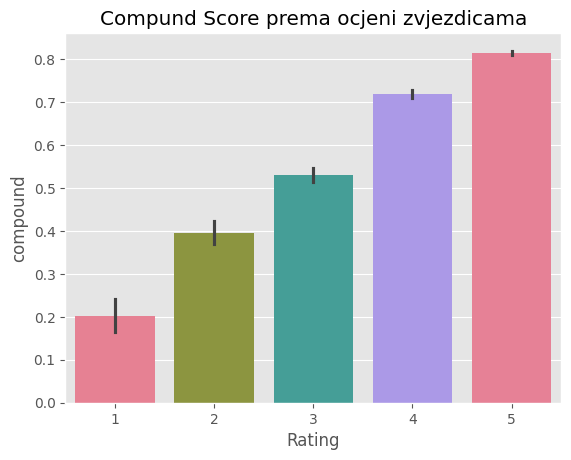

In [19]:
ax = sns.barplot(data=vaders, x='Rating', y='compound', hue='Rating', palette='husl', legend=False)
ax.set_title('Compund Score prema ocjeni zvjezdicama')
plt.show()

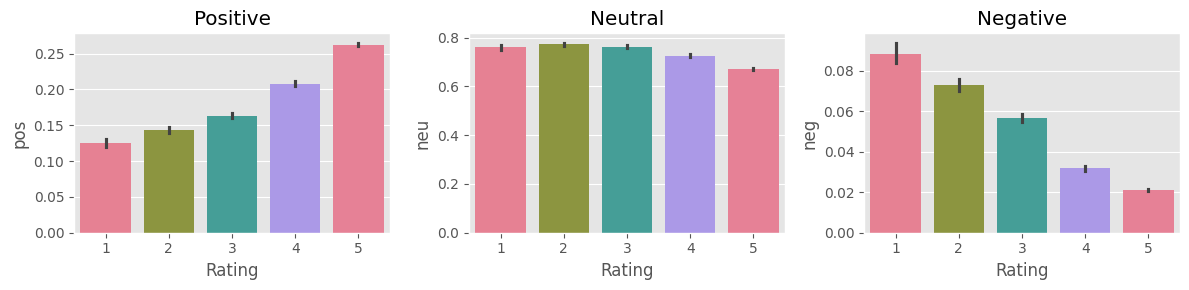

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0], hue='Rating', palette='husl', legend=False)
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1], hue='Rating', palette='husl', legend=False)
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2], hue='Rating', palette='husl', legend=False)
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [21]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [22]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [23]:
print(example)
sia.polarity_scores(example)

I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c


{'neg': 0.027, 'neu': 0.792, 'pos': 0.181, 'compound': 0.9427}

In [24]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.3668031, 'roberta_neu': 0.3801399, 'roberta_pos': 0.25305697}


In [25]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [26]:
df = df.head(500)

In [27]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Review Text']
        myid = row['Unnamed: 0']

        if not isinstance(text, str):
            text = ""

        vader_result = sia.polarity_scores(text)
        vader_result_rename = {f"vader_{key}": value for key, value in vader_result.items()}

        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both

    except Exception as e:
        print(f'Broke for id {myid} with error: {e}')


  0%|          | 0/500 [00:00<?, ?it/s]

In [28]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Unnamed: 0'})
results_df = results_df.merge(df, how='left')

In [29]:
results_df.columns

Index(['Unnamed: 0', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Clothing ID', 'Age',
       'Title', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

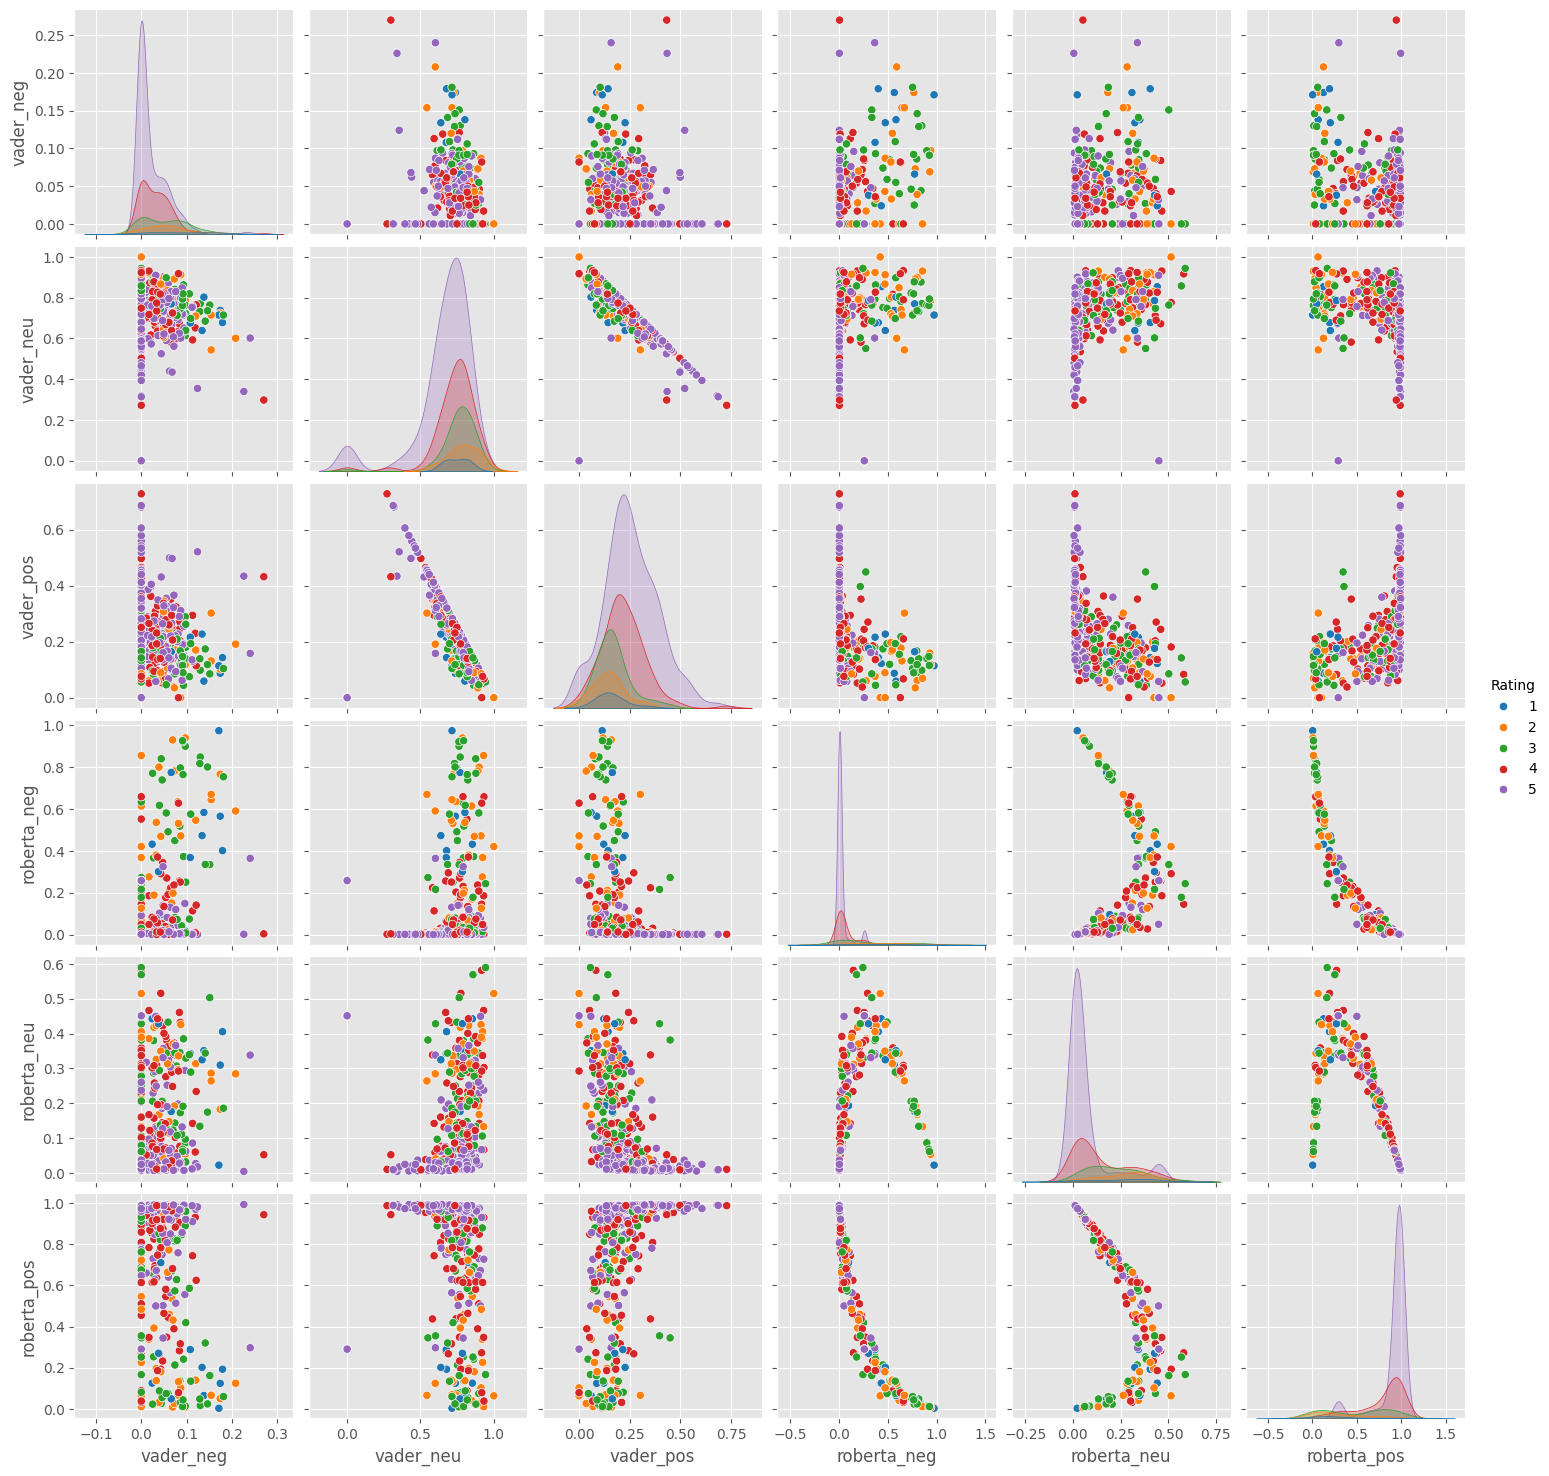

In [30]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Rating',
            palette='tab10')
plt.show()

In [31]:
results_df.query('Rating == 1') \
    .sort_values('roberta_pos', ascending=False)['Review Text'].values[0]

"I was very excited to order this top in red xs. so cute, but it was huge, shapeless and support thin! it had to go back. i should've looked at other reviews."

In [32]:
results_df.query('Rating == 1') \
    .sort_values('vader_pos', ascending=False)['Review Text'].values[0]

"I was very excited to order this top in red xs. so cute, but it was huge, shapeless and support thin! it had to go back. i should've looked at other reviews."

In [33]:
results_df.query('Rating == 5') \
    .sort_values('roberta_neg', ascending=False)['Review Text'].values[0]

'Loved the green color, the cut is super flattering, but alas, i do need hte petite, ti was a bit long and i looked a little lost. unfrotuantely, the color is sold out in petite :-('

In [34]:
results_df.query('Rating == 5') \
    .sort_values('vader_neg', ascending=False)['Review Text'].values[0]

'Loved the green color, the cut is super flattering, but alas, i do need hte petite, ti was a bit long and i looked a little lost. unfrotuantely, the color is sold out in petite :-('

In [35]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [36]:
sent_pipeline('I love playing football!')

[{'label': 'POSITIVE', 'score': 0.9997661709785461}]

In [37]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]